# StackOverflow Developers Surveys

### Exploratory Data Analysis & Data Cleaning

In [104]:
# Importing libraries and creating df

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Printing dataframe shape & info to check missing data

df = pd.read_csv('developer_dataset.csv', low_memory=False)
print('Dataframe has: \n' + str(df.shape[0]) + ' Rows \n' + str(df.shape[1]) + ' Columns')
print(df.info())

Dataframe has: 
111209 Rows 
21 Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-

In [105]:
# Checking  % of missing data for each column and printing values

maxRows = df['RespondentID'].count()
print('% Missing Data:')
print(str(round((1 - df.count() / maxRows),4) * 100))

% Missing Data:
RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64


In [106]:
# Removing columns with 60% or more missing data

df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
dtype: float64


['United States' 'Canada' 'Mexico' 'France' 'Germany' 'Spain'
 'United Kingdom' 'China' 'Japan']


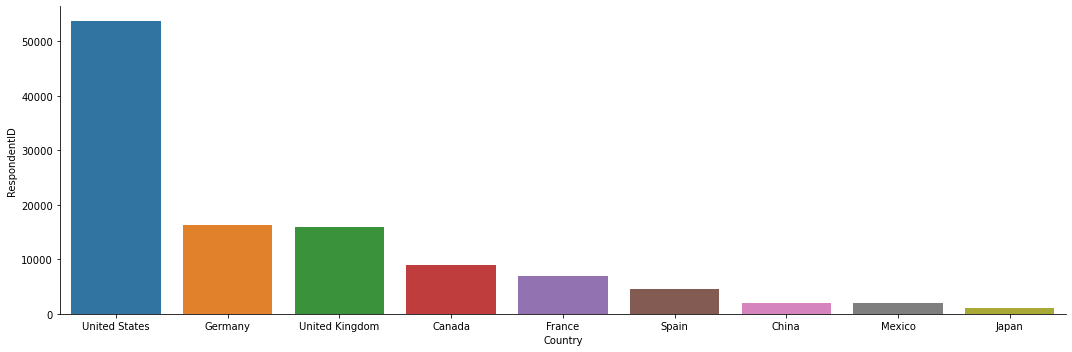

In [107]:
#Getting unique values for 'country' column in order to groupby

print(df.Country.unique())
df_temp = df[['Country', 'RespondentID']]
df_sorted = df_temp.groupby('Country', as_index=False).count().sort_values('RespondentID', ascending = False)

# Plotting respondents count by country

sns.catplot(x='Country', y = 'RespondentID', data=df_sorted, kind='bar', aspect = 3)
plt.show()

Text(0.5, 1.0, 'Missind Data Count for "DevType" Column')

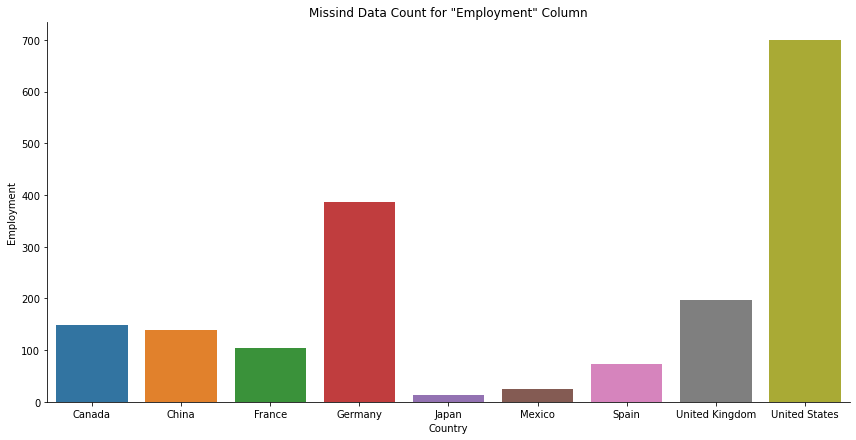

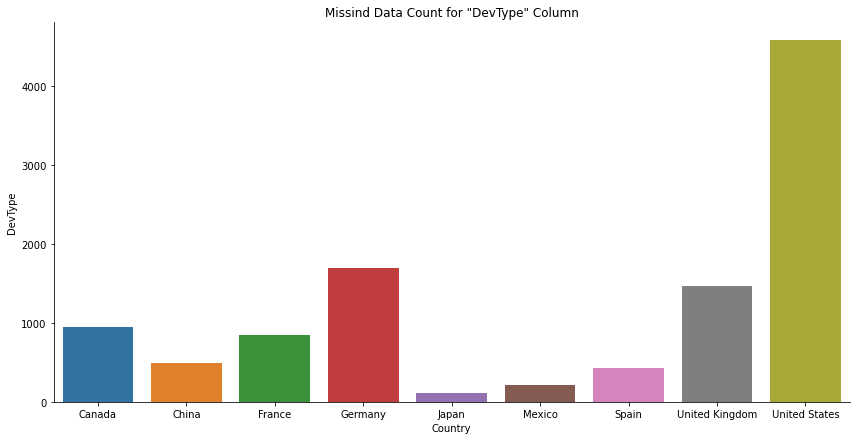

In [108]:
# Checking missing data for Employment and DevType plotting the two Series grouped by country

missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
plt.title('Missind Data Count for "Employment" Column')

B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

plt.title('Missind Data Count for "DevType" Column')

In [109]:
#Pairwise Deletion to only delete rows that have missing data for either Employment or DevType:

df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')


In [110]:
# Post drop check
df[['Employment','DevType']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99975 entries, 0 to 111198
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Employment  99975 non-null  object
 1   DevType     99975 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


['Employed full-time' 'Employed part-time'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work' 'Retired']


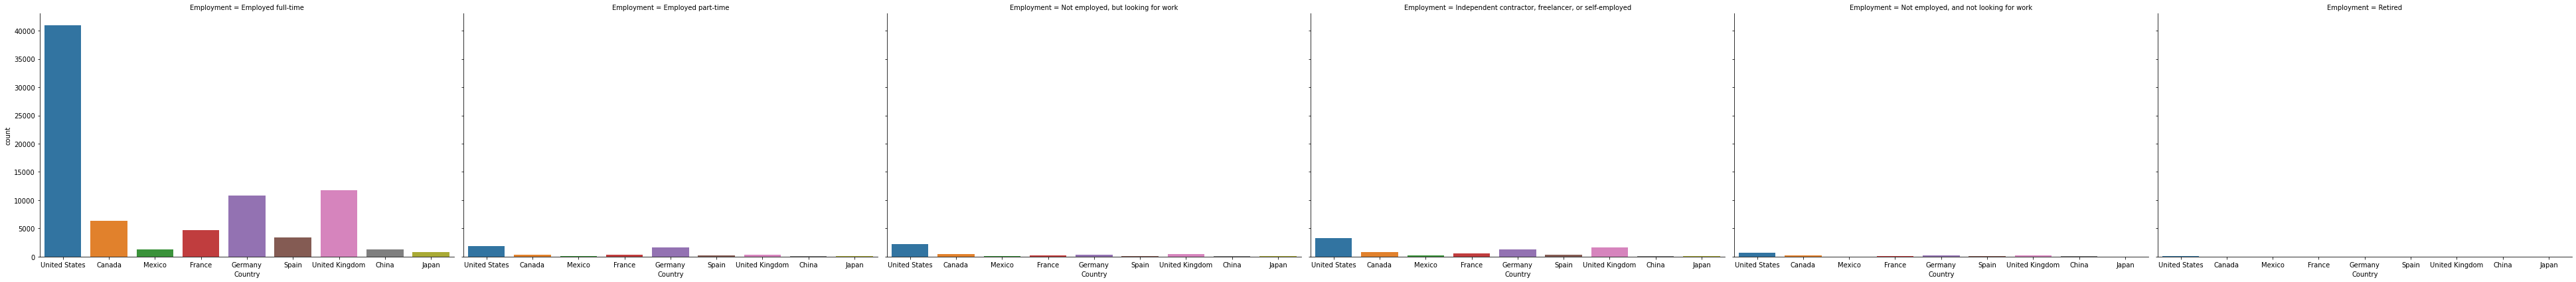

In [111]:
# Employment status for each country
emp_type = df.Employment.unique()
print(emp_type)
# Plotting employment count
devFig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
plt.savefig('1.jpg')

In [112]:
devdf = df.loc[:, ('DevType', 'Country')]
print('BEFORE: \n ' )
print(devdf.head(3))

# DevType labels for each country
# Defining macro group to scan for and adding column with boolean value if string contain desired word
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
devdf.loc[devdf['DevType'].str.contains('data'), 'Data'] = True

print('AFTER: \n ' )
print(devdf.head(3))
# Melting df, we will generate new columns 'DevCat' and related 'DevFlag' = True/False for each category

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin','Data'], 
    var_name='DevCat',
    value_name='DevFlag')
print('\n \n MELTED DF WILL LOOKS LIKE: ')
print(devdf.head(5))


BEFORE: 
 
                                    DevType        Country
0  Engineering manager;Full-stack developer  United States
1                     Developer, full-stack  United States
3                      Full-stack developer  United States
AFTER: 
 
                                    DevType        Country BackEnd FrontEnd  \
0  Engineering manager;Full-stack developer  United States     NaN      NaN   
1                     Developer, full-stack  United States     NaN      NaN   
3                      Full-stack developer  United States     NaN      NaN   

  FullStack Mobile Admin Data  
0       NaN    NaN   NaN  NaN  
1      True    NaN   NaN  NaN  
3       NaN    NaN   NaN  NaN  

 
 MELTED DF WILL LOOKS LIKE: 
         Country   DevCat DevFlag
0  United States  BackEnd     NaN
1  United States  BackEnd     NaN
2  United States  BackEnd     NaN
3  United States  BackEnd    True
4  United States  BackEnd    True


                          DevFlag
Country        DevCat            
Canada         Admin         1481
               BackEnd       2375
               Data           264
               FrontEnd      1594
               FullStack     2656
               Mobile         712
China          Admin          172
               BackEnd        383
               Data            43
               FrontEnd       229
               FullStack      276
               Mobile         144
France         Admin          927
               BackEnd       1817
               Data           353
               FrontEnd      1063
               FullStack     1906
               Mobile         547
Germany        Admin         2985
               BackEnd       4490
               Data           607
               FrontEnd      2788
               FullStack     4271
               Mobile        1315
Japan          Admin          157
               BackEnd        306
               Data            64
              

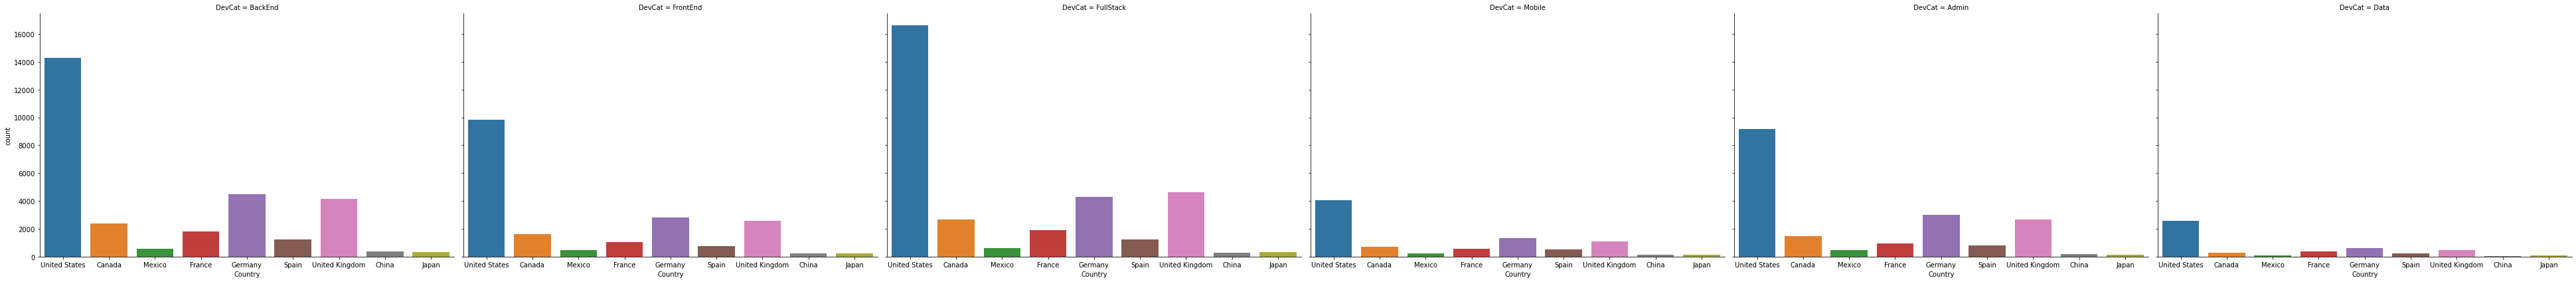

In [113]:
# Grouping by country and plotting DevType counts
print(devdf.groupby(['Country','DevCat']).count())
devdf.dropna(how='any', inplace=True)
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);
plt.savefig('2.jpg')

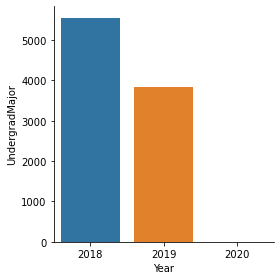

In [114]:
#Checking missing data in UndergradMajor column
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);



In [115]:
# Sort by Respondent ID and Year so that each person's data is carried backwards correctly and NaN back filled
print('BEFORE BACKFILL')
# generating temporary sorted df in order to backfill the actual one and show the difference before and after
df_sorted = df.sort_values(['RespondentID','Year'])
print(df_sorted.loc[:,('RespondentID','Year', 'UndergradMajor')].head(20))


BEFORE BACKFILL
    RespondentID  Year                                     UndergradMajor
0              1  2018  Computer science, computer engineering, or sof...
1              1  2019  Computer science, computer engineering, or sof...
3              2  2018  Computer science, computer engineering, or sof...
4              2  2019  Computer science, computer engineering, or sof...
5              2  2020  Computer science, computer engineering, or sof...
6              3  2018  Computer science, computer engineering, or sof...
7              3  2019                                                NaN
8              3  2020  Computer science, computer engineering, or sof...
9              4  2018  Fine arts or performing arts (ex. graphic desi...
10             4  2019  Information systems, information technology, o...
11             4  2020  Computer science, computer engineering, or sof...
12             5  2018  Computer science, computer engineering, or sof...
13             5  2019

AFTER
    RespondentID  Year                                     UndergradMajor
0              1  2018  Computer science, computer engineering, or sof...
1              1  2019  Computer science, computer engineering, or sof...
3              2  2018  Computer science, computer engineering, or sof...
4              2  2019  Computer science, computer engineering, or sof...
5              2  2020  Computer science, computer engineering, or sof...
6              3  2018  Computer science, computer engineering, or sof...
7              3  2019  Computer science, computer engineering, or sof...
8              3  2020  Computer science, computer engineering, or sof...
9              4  2018  Fine arts or performing arts (ex. graphic desi...
10             4  2019  Information systems, information technology, o...
11             4  2020  Computer science, computer engineering, or sof...
12             5  2018  Computer science, computer engineering, or sof...
13             5  2019  Computer

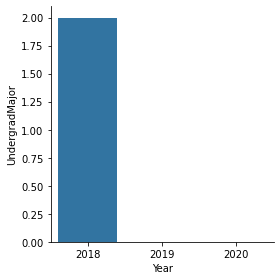

In [116]:
# backfill
df['UndergradMajor'].bfill(axis=0, inplace=True)
print('AFTER')
print(df.loc[:,('RespondentID','Year', 'UndergradMajor')].head(20))
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

     Year         EduCat EduFlag
20   2018  SocialScience    True
60   2019  SocialScience    True
77   2018  SocialScience    True
92   2018  SocialScience    True
112  2019  SocialScience    True


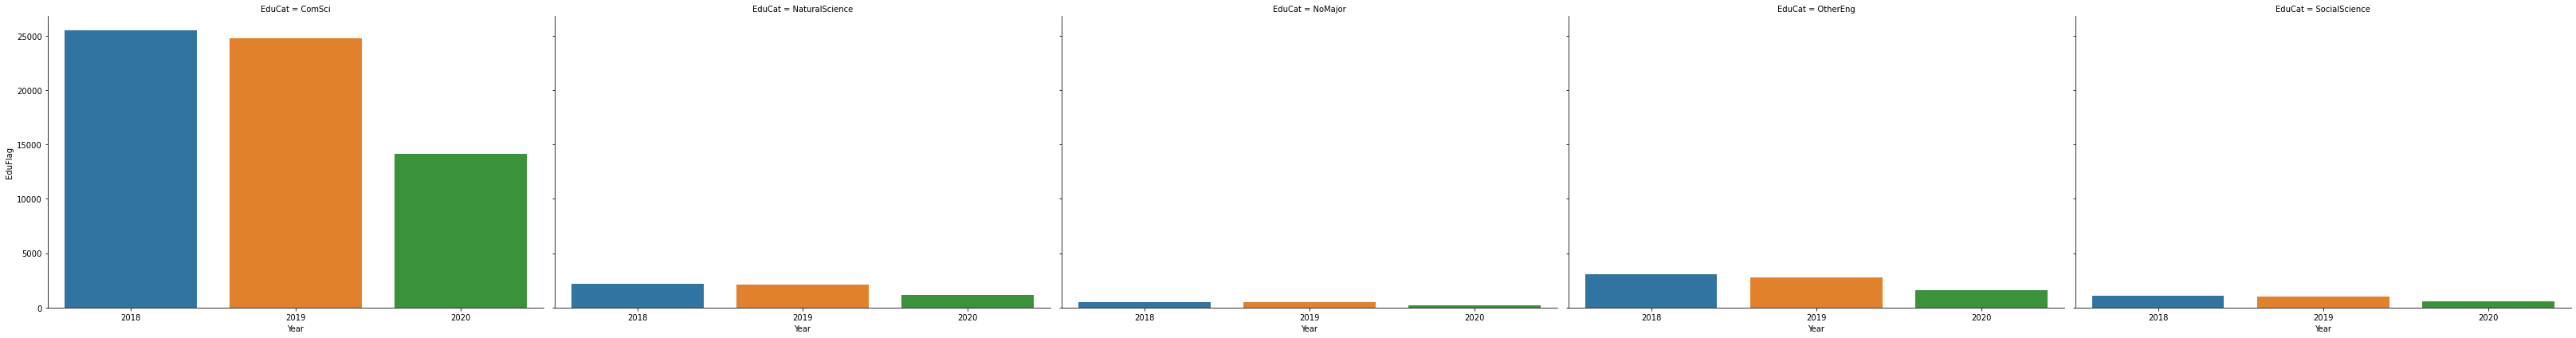

In [117]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
# Building new sliced df with year and undergradmajor column
edudf = df.loc[:, ('Year','UndergradMajor')]
edudf.dropna(how='any', inplace=True)
# Adding flag columns as we did for DevType early
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
# Melting df
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
# Removing NaN
edudf.dropna(how='any', inplace=True)
# Checking df 
print(edudf.head())
# Grouping
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
# Plotting
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

plt.savefig('3.jpg')

        Year  YearsCodePro  ConvertedComp        Country
0       2018           NaN       141000.0  United States
1       2019           1.0        61000.0  United States
3       2018           4.0        48000.0  United States
4       2019           8.0        90000.0  United States
5       2020          13.0       116000.0  United States
...      ...           ...            ...            ...
111187  2018           NaN        93000.0          Japan
111188  2018           NaN       116000.0          Japan
111190  2018           NaN         8000.0          Japan
111191  2018           NaN        71000.0          Japan
111198  2018           1.0       144000.0          Japan

[99975 rows x 4 columns]


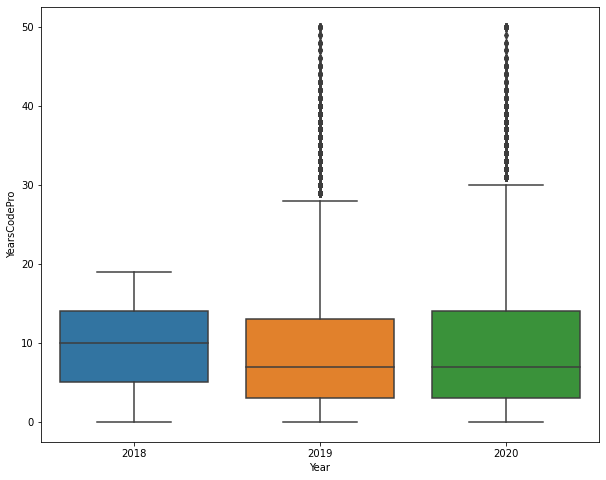

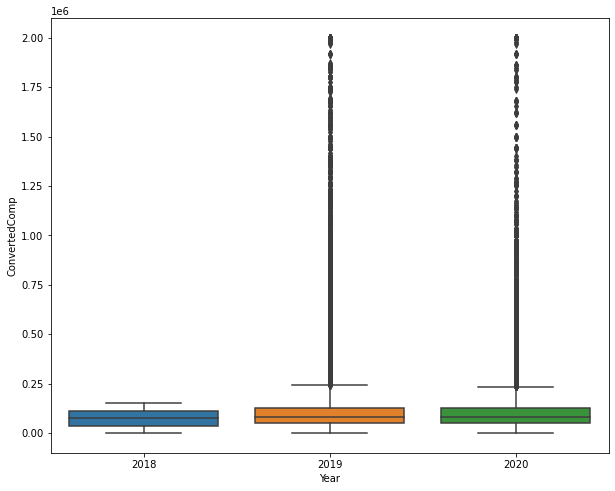

In [118]:
# Compensation VS Years of activity analisys 
compFields = df[['Year','YearsCodePro','ConvertedComp','Country']]
print(compFields)
# Years of coding as pro
plt.figure(figsize= (10,8))
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
plt.show()

# Compensation
plt.figure(figsize= (10,8))
E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)
plt.show()

We see that although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. 

This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation. Since there is a clear trend with the data points, we decide the best method for filling in the missing data for these two columns is through Multiple Imputation:



### Filling missing values using Multiple Imputation

In [16]:
print('Before predicting missing values: \n'.upper())
print(compFields)


# Building model to impute missing data, predicting them using the available context

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])
print('\nAfter predicting missing values: \n'.upper())
print(compdf)

BEFORE PREDICTING MISSING VALUES: 

        Year  YearsCodePro  ConvertedComp        Country
0       2018           NaN       141000.0  United States
1       2019           1.0        61000.0  United States
3       2018           4.0        48000.0  United States
4       2019           8.0        90000.0  United States
5       2020          13.0       116000.0  United States
...      ...           ...            ...            ...
111187  2018           NaN        93000.0          Japan
111188  2018           NaN       116000.0          Japan
111190  2018           NaN         8000.0          Japan
111191  2018           NaN        71000.0          Japan
111198  2018           1.0       144000.0          Japan

[99975 rows x 4 columns]

AFTER PREDICTING MISSING VALUES: 

       YearsCodePro  ConvertedComp
0              10.0       141000.0
1               1.0        61000.0
2               4.0        48000.0
3               8.0        90000.0
4              13.0       116000.0
...     

/var/folders/p4/rwxltnfs6qvgnnqwbq64_g4m0000gn/T/ipykernel_16040/281722601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf.loc[:, ('YearsCodePro')], q=5)


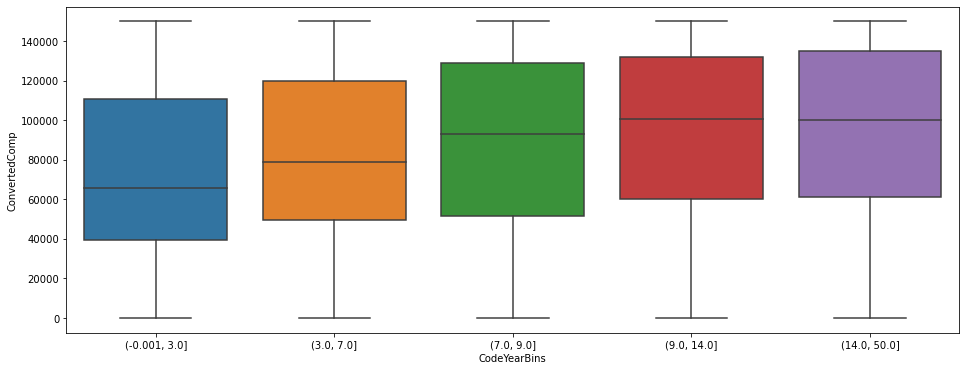

In [17]:

# cutting out outliners
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
# creating 5 different bins for YearsCodePro
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf.loc[:, ('YearsCodePro')], q=5)
# plotting distribution
plt.figure(figsize=(16,6))
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)
plt.show()

In [18]:
# Sampling 1k datapoints for scatterplot visual
dfSample = df.loc[:, ('YearsCodePro', 'ConvertedComp', 'Country')].sample(10000) 
print(dfSample.head())


        YearsCodePro  ConvertedComp         Country
106150           5.0        65424.0  United Kingdom
75581            4.0        82726.0  United Kingdom
20120            3.0        64404.0   United States
56593            9.0       140000.0   United States
55457            6.0        64859.0         Germany


N° or respondent
48958
Represented: 
2448


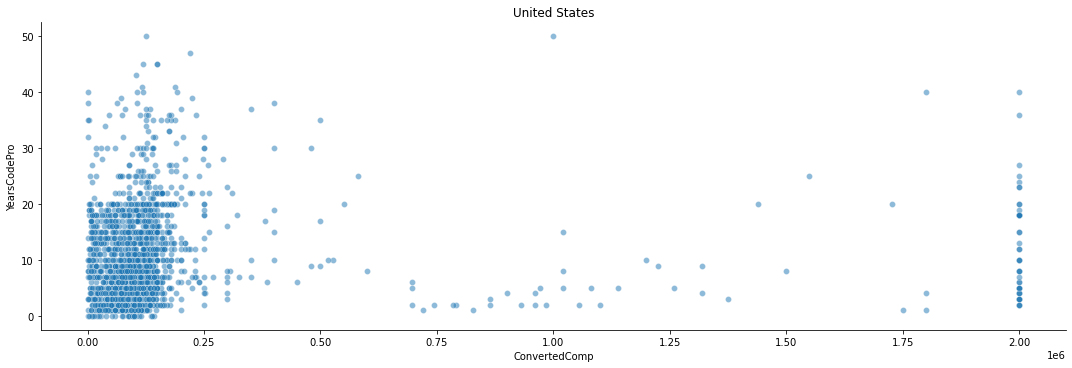

N° or respondent
7993
Represented: 
1599


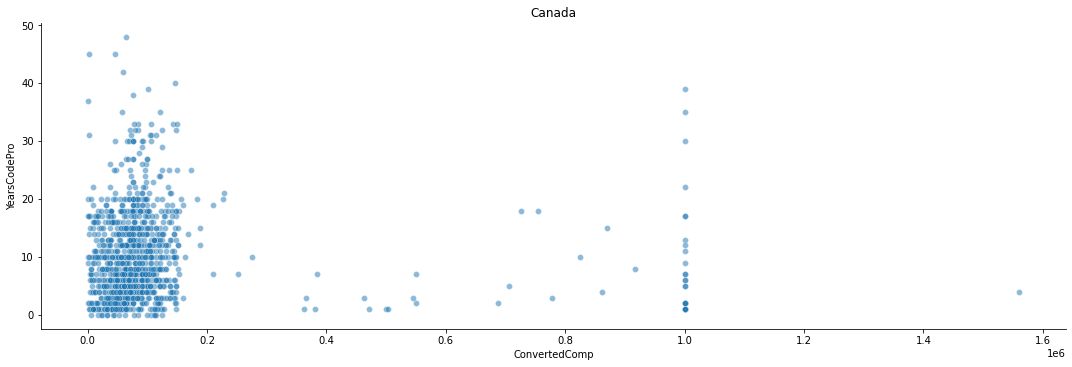

N° or respondent
1709
Represented
1709


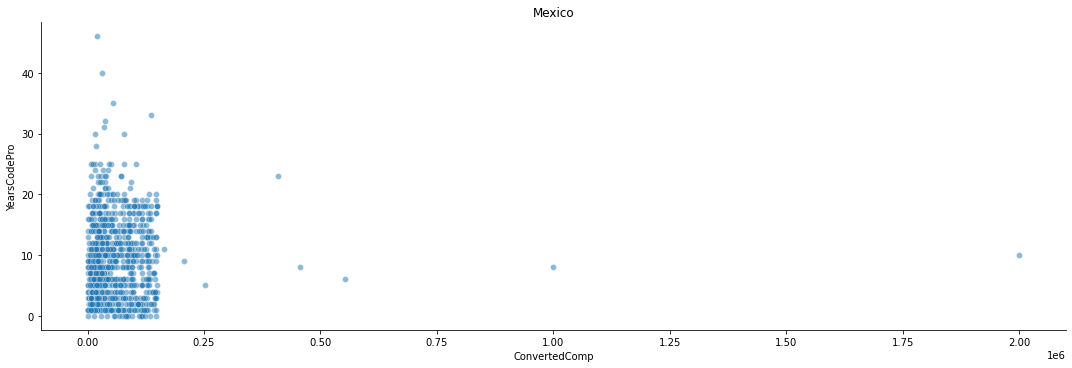

N° or respondent
5985
Represented: 
1197


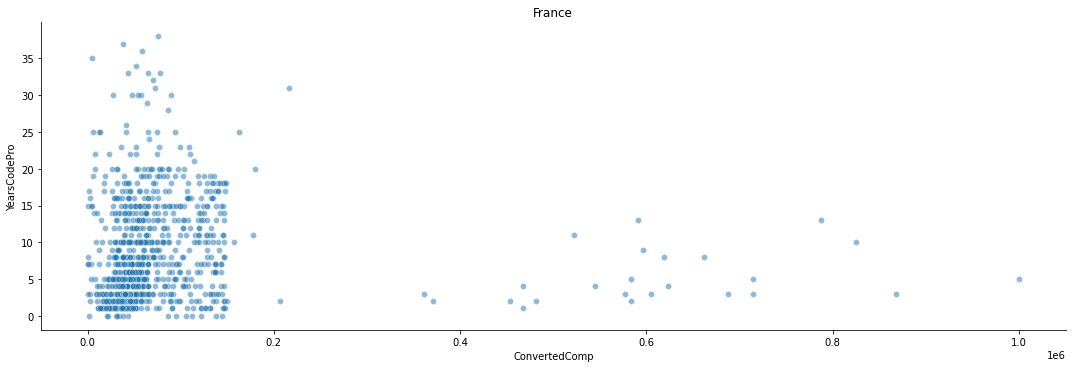

N° or respondent
14408
Represented: 
2882


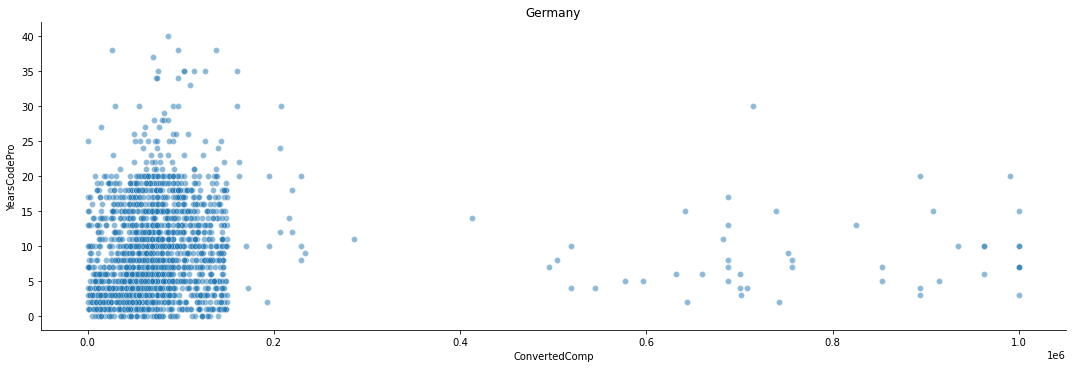

N° or respondent
4089
Represented: 
2044


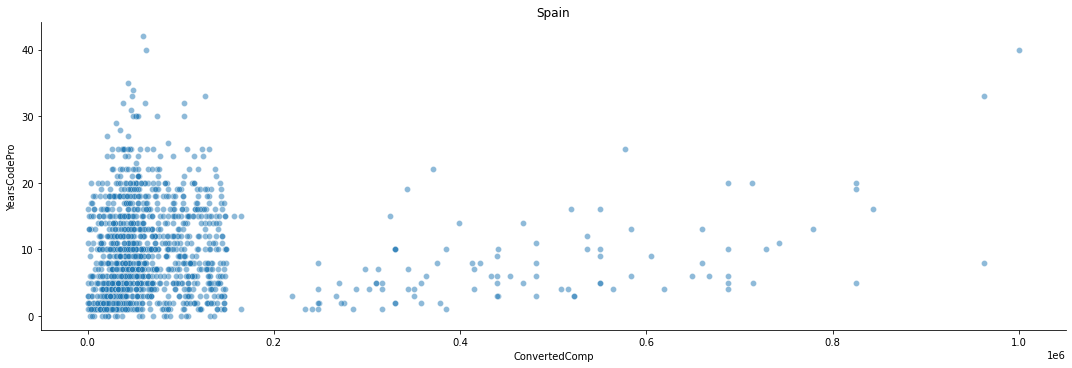

N° or respondent
14328
Represented: 
2866


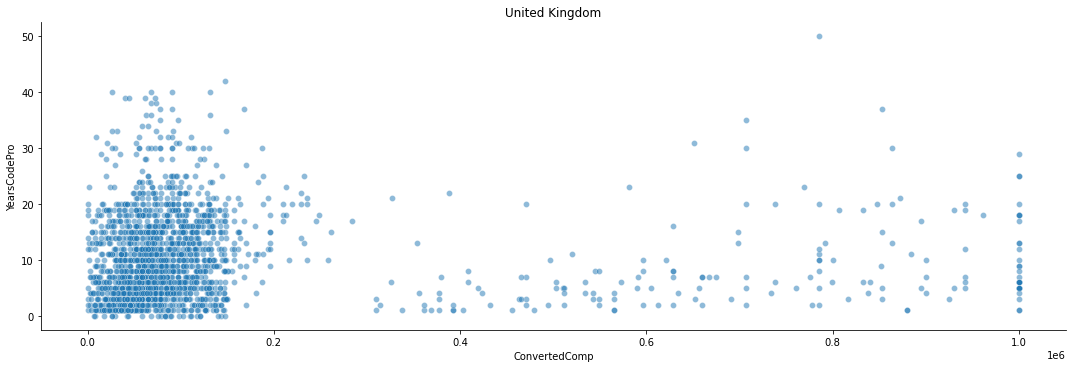

N° or respondent
1567
Represented
1567


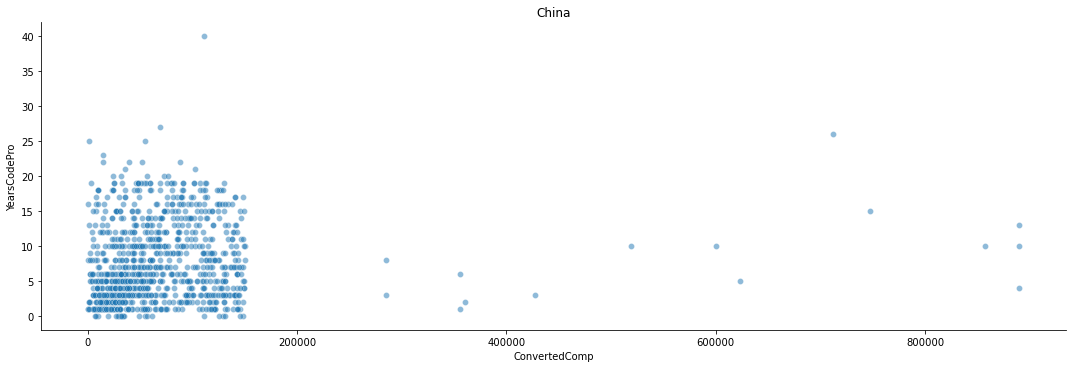

N° or respondent
938
Represented
938


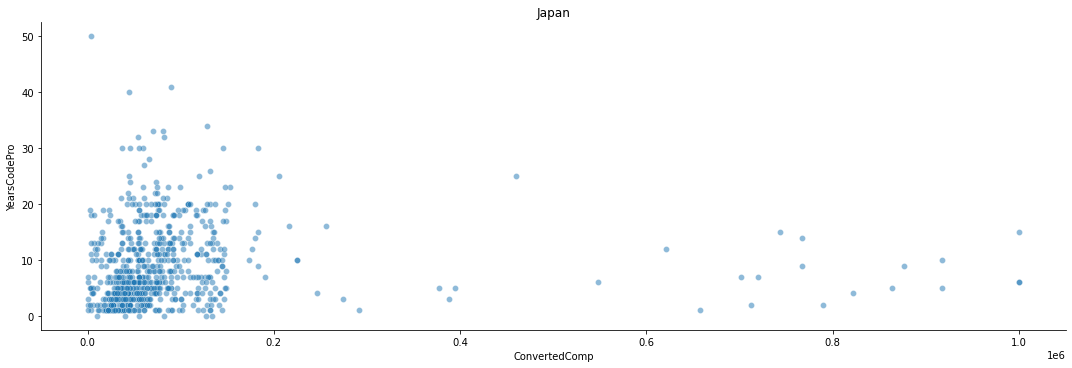

In [99]:
countries = df.Country.unique()

for country in countries:
    dftemp = df[df.Country==country]
    print('N° or respondent')
    print(dftemp.shape[0])
    maxpoints = dftemp.shape[0]
    #if datapoints are greater than 25k we will sampe 5% of them 
    if maxpoints > 25000:
        sample = dftemp.sample(round(dftemp.shape[0]/20))
        print('Represented: ')
        print(round(sample.shape[0]))
        a = sns.relplot(x='ConvertedComp', y='YearsCodePro',alpha=0.5,data=sample, aspect = 3)
    #if datapoints are greater than 5k we will sampe 20% of them
    elif maxpoints > 5000:
        sample = dftemp.sample(round(dftemp.shape[0]/5))
        print('Represented: ')
        print(round(sample.shape[0]))
        a = sns.relplot(x='ConvertedComp', y='YearsCodePro',alpha=0.5,data=sample, aspect = 3)    
    #if datapoints are greater than 2,5k we will sampe 50% of them
    elif maxpoints > 2500:
        sample = dftemp.sample(round(dftemp.shape[0]/2))
        print('Represented: ')
        print(round(sample.shape[0]))
        a = sns.relplot(x='ConvertedComp', y='YearsCodePro',alpha=0.5,data=sample, aspect = 3)    
    
    else:
        a = sns.relplot(x='ConvertedComp', y='YearsCodePro',alpha=0.5,data=dftemp, aspect = 3)
        print('Represented')
        print(dftemp.shape[0])
   
    plt.title('{}'.format(country))
    plt.show()

          Country  ConvertedComp
0          Canada  102949.961417
1           China   69752.328047
2          France   76473.792840
3         Germany   88790.821116
4           Japan   86044.070243
5          Mexico   50048.023693
6           Spain   79666.426411
7  United Kingdom  118406.764534
8   United States  164093.278404


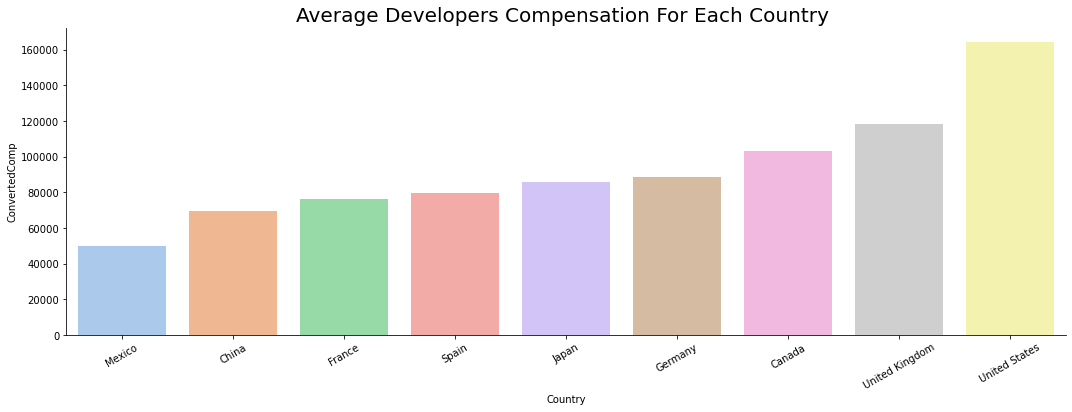

In [21]:
dfCompavg = df.loc[:,('Country','ConvertedComp')].groupby('Country', as_index=False).mean('ConvertedComp')
print(dfCompavg)
a = sns.catplot(x='Country', y='ConvertedComp',data=dfCompavg.sort_values('ConvertedComp'),
                kind='bar',
                palette='pastel',
                aspect = 3)
a.set_xticklabels(rotation=30)

plt.title('average developers compensation for each country '.title(), size= 20)
plt.show()


          Country  ConvertedComp
0          Canada        69581.0
1           China        55000.0
2          France        53000.0
3         Germany        65308.0
4           Japan        59000.0
5          Mexico        29000.0
6           Spain        48121.0
7  United Kingdom        70658.0
8   United States        97000.0


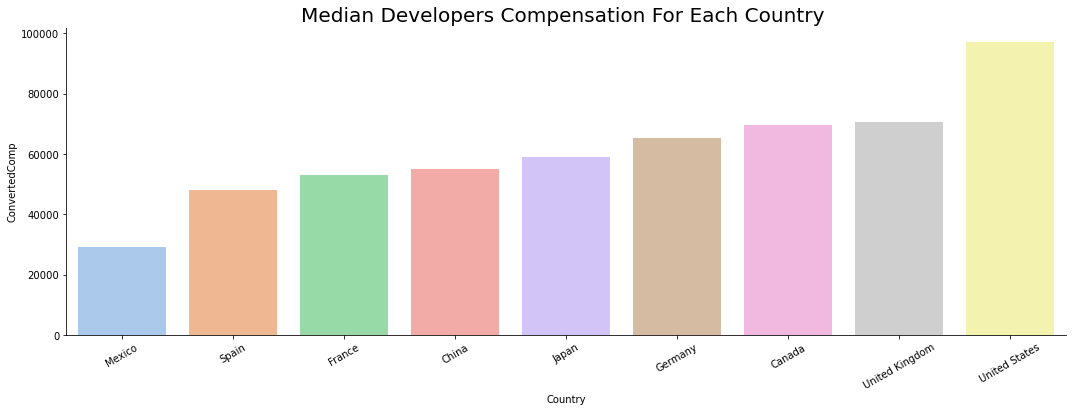

In [22]:

dfCompmd = df.loc[:,('Country','ConvertedComp')].groupby('Country', as_index=False).median('ConvertedComp')

print(dfCompmd)
b = sns.catplot(x='Country', y='ConvertedComp',data=dfCompmd.sort_values('ConvertedComp'),
                kind='bar',
                palette='pastel',
                aspect = 3)

b.set_xticklabels(rotation=30)

plt.title('median developers compensation for each country '.title(), size= 20)
plt.show()

In [121]:
# analizing languges with same process as DevType and Education

df_lww = devdf = df.loc[:, ('LanguageWorkedWith', 'Country')].dropna()


df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('C|C+|C#'), 'C/C+/#'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('HTLM|CSS'), 'HTML/CSS'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Java|JavaScript'), 'Java/JavaScript'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Ruby'), 'Ruby'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Python'), 'Python'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('SQL'), 'SQL'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Swift'), 'Swift'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Shell|PoweerShell'), 'Shell/PowerShell'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Ruby'), 'Ruby'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Haskell'), 'Haskell'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('PHP'), 'PHP'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('Rust'), 'Rust'] = True
df_lww.loc[df_lww['LanguageWorkedWith'].str.contains('R'), 'R'] = True

print(df_lww )
df_lww = df_lww.melt(id_vars=['Country'],
                    value_vars=['C/C+/#','HTML/CSS','Java/JavaScript', 'Ruby', 'Python', 'SQL', 'Swift', 'Shell/PowerShell','Haskell', 'PHP', 'Rust','R'], 
                    var_name='Language',
                    value_name='LangFlag')

df_lww = df_lww.dropna()


                                       LanguageWorkedWith        Country  \
1                                     C;C++;C#;Python;SQL  United States   
3        C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell  United States   
4       Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...  United States   
5                                              Python;SQL  United States   
6                                     JavaScript;HTML;CSS  United States   
...                                                   ...            ...   
111183          C;Java;JavaScript;PHP;Python;SQL;VBA;HTML          Japan   
111184                          C;JavaScript;PHP;HTML;CSS          Japan   
111186  C#;CoffeeScript;Java;JavaScript;Objective-C;Py...          Japan   
111187             Java;JavaScript;SQL;VBA;Cobol;HTML;CSS          Japan   
111188                                               Java          Japan   

       C/C+/# HTML/CSS Java/JavaScript  Ruby Python   SQL Swift  \
1        True      N


 
 MELTED DF WILL LOOKS LIKE: 
               Country Language LangFlag
0        United States   C/C+/#     True
1        United States   C/C+/#     True
2        United States   C/C+/#     True
4        United States   C/C+/#     True
5        United States   C/C+/#     True
...                ...      ...      ...
1122152          Japan        R     True
1122153          Japan        R     True
1122160          Japan        R     True
1122162          Japan        R     True
1122165          Japan        R     True

[418127 rows x 3 columns]
            Country          Language  LangFlag
96    United States            C/C+/#     39227
99    United States   Java/JavaScript     37951
97    United States          HTML/CSS     30722
105   United States               SQL     27727
106   United States  Shell/PowerShell     22480
101   United States            Python     22072
102   United States                 R     10800
100   United States               PHP      9335
103   United Stat

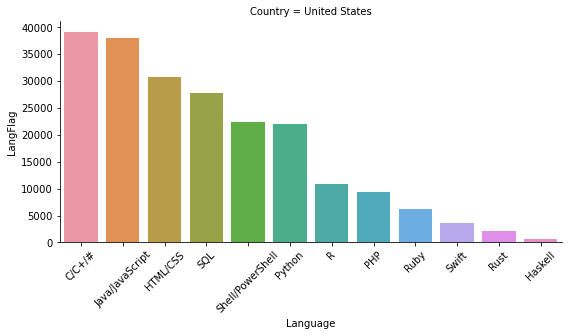

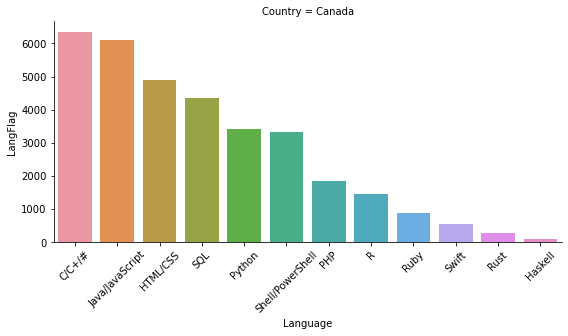

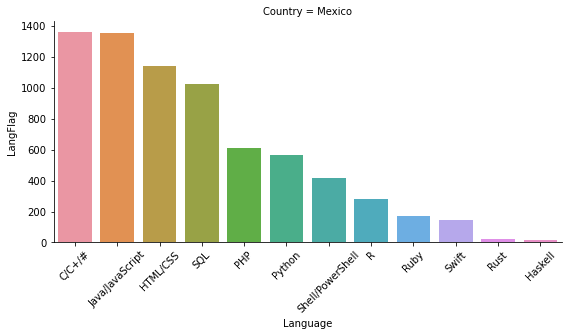

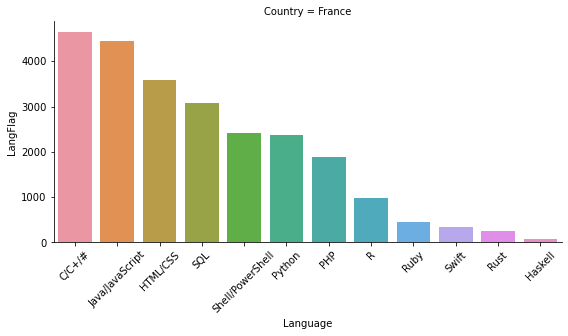

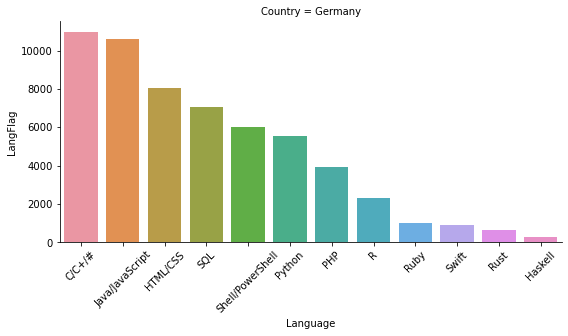

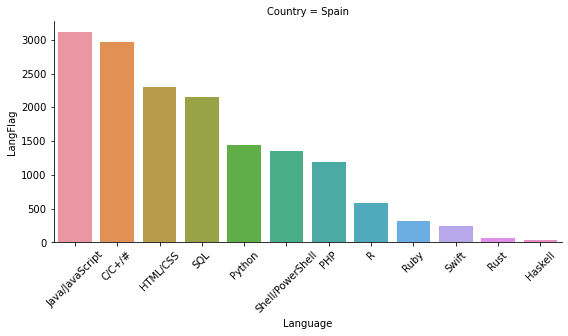

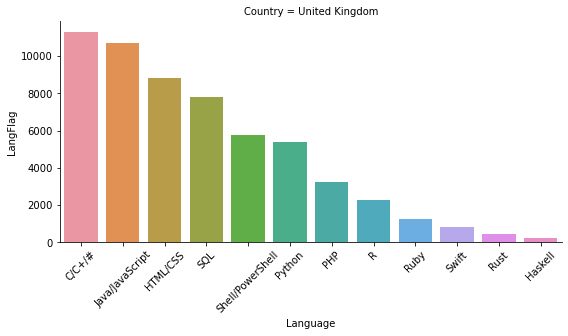

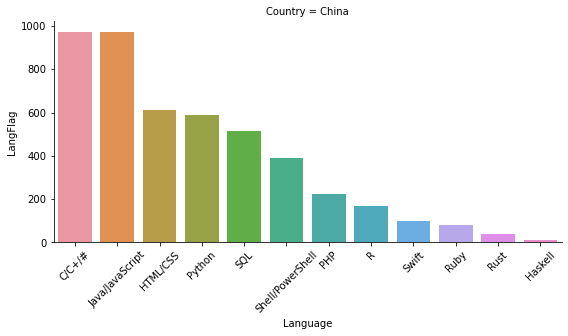

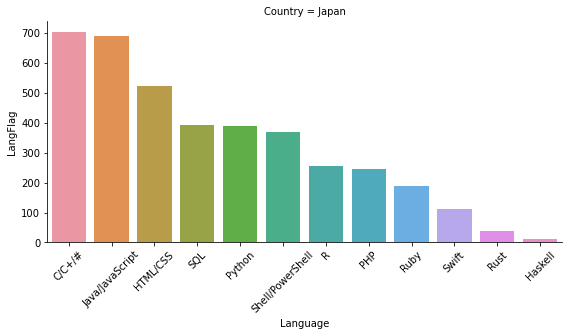

In [133]:
print('\n \n MELTED DF WILL LOOKS LIKE: ')
print(df_lww)
# Grouping by country and plotting language counts
langDf = df_lww.groupby(['Country', 'Language'], as_index=False).count().sort_values(['Country','LangFlag'], ascending = False)
print(langDf.head(20))
for country in countries:
    dftemp = langDf[langDf.Country == country]
    langFig = sns.catplot(x="Language",y='LangFlag', col="Country", 
                data=dftemp, kind='bar',
                height=4, aspect=2);
    langFig.set_xticklabels(rotation=45)
    plt.savefig('{}_lang.jpg'.format(country))


In [ ]:
df.to_csv('developer_dataset_cleaned.csv', index=False, header=True)